# Listing 6.1 Word-level one-hot encoding (toy example)

In [3]:
import numpy as np
samples = ['The cat sat on mat.','The dog ate my homework']
token_index ={}
for sample in samples:
    
    for word in sample.split():
        if word not in token_index:
            token_index[word] =len(token_index) + 1
            
            
max_length =10

results = np.zeros(shape=(len(samples),max_length, max(token_index.values()) + 1))
print((len(samples),max_length),max(token_index.values()) +1)
for i, sample in enumerate(samples):
    print(i)
    for j, word in list(enumerate(sample.split()))[:max_length]:
        print(i,j)
        index = token_index.get(word)
results[i, j, index] = 1.


(2, 10) 10
0
0 0
0 1
0 2
0 3
0 4
1
1 0
1 1
1 2
1 3
1 4


# Listing 6.2 Character-level one-hot encoding (toy example

In [5]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
print(token_index)
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
  
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
 
 results[i, j, index] = 1.


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

# Listing 6.3 Using Keras for word-level one-hot encoding

In [11]:
from keras.preprocessing.text import Tokenizer

samples= ['The cat sat on mat.','The dog ate my homework.']

tokenizer =Tokenizer(num_words=1000)
print(tokenizer)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
print(sequences)
one_hot_results =tokenizer.texts_to_matrix(samples,mode='binary')
print(one_hot_results)
word_index=tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

[[1, 2, 3, 4, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Found 9 unique tokens.


# Listing 6.4 Word-level one-hot encoding with hashing trick (toy example)

In [15]:
samples = ['The cat sat on mat.','The dog ate my homework.']
dimensionality =1000
max_length = 10

results = np.zeros((len(samples),max_length, dimensionality))
for i,sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index =abs(hash(word)) % dimensionality
        print(index)
        results[i,j,index]=1.

840
859
980
476
674
840
258
99
371
289


# Listing 6.5 Instantiating an Embedding layer

In [85]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

# Listing 6.6 Loading the IMDB data for use with an Embedding layer

In [89]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
                                             

SyntaxError: cannot assign to function call (Temp/ipykernel_10684/2816430241.py, line 5)

# Listing 6.7 Using an Embedding layer and classifier on the IMDB data

In [90]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
maxlen = 20(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10,batch_size=32,validation_split=0.2)

SyntaxError: cannot assign to function call (Temp/ipykernel_10684/1226768872.py, line 4)

# Listing 6.8 Processing the labels of the raw IMDB data

In [16]:
import os

imdb_dir = 'C:/Users/HP/Downloads/aclImdb/aclImdb'

train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/HP/Downloads/aclImdb/aclImdb\\train\\neg'

# Listing 6.9 Tokenizing the text of the raw IMDB data

In [109]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# Listing 6.10 Parsing the GloVe word-embeddings file

In [116]:
import os
import numpy as np

glove_dir = r'C:\Users\HP\Downloads\glove.6B'

embeddings_index = {}

with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


# Listing 6.11 Preparing the GloVe word-embeddings matrix

In [117]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


# Listing 6.12 Model definition

In [121]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


# Listing 6.13 Loading pretrained word embeddings into the Embedding layer

In [122]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Listing 6.14 Training and evaluation

In [123]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

model.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
7/7 [==============================] - 4s 302ms/step - loss: 1.6370 - acc: 0.5250 - val_loss: 0.7551 - val_acc: 0.5040
Epoch 2/10
7/7 [==============================] - 1s 226ms/step - loss: 0.6565 - acc: 0.6100 - val_loss: 1.0288 - val_acc: 0.4973
Epoch 3/10
7/7 [==============================] - 1s 221ms/step - loss: 0.4321 - acc: 0.7950 - val_loss: 1.0927 - val_acc: 0.5024
Epoch 4/10
7/7 [==============================] - 1s 223ms/step - loss: 0.3967 - acc: 0.8200 - val_loss: 0.8324 - val_acc: 0.5105
Epoch 5/10
7/7 [==============================] - 1s 222ms/step - loss: 0.3404 - acc: 0.8600 - val_loss: 1.0551 - val_acc: 0.5026
Epoch 6/10
7/7 [==============================] - 1s 226ms/step - loss: 0.2659 - acc: 0.8950 - val_loss: 0.9846 - val_acc: 0.5026
Epoch 7/10
7/7 [==============================] - 1s 222ms/step - loss: 0.1499 - acc: 0.9700 - val_loss: 1.0803 - val_acc: 0.5105
Epoch 8/10
7/7 [==============================] - 1s 218ms/step - loss: 0.0733 - acc: 0.99

# Listing 6.15 Plotting the results

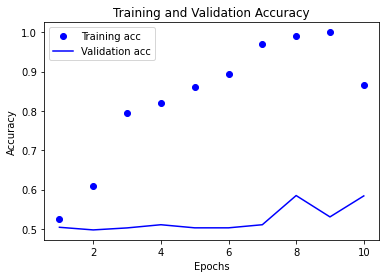

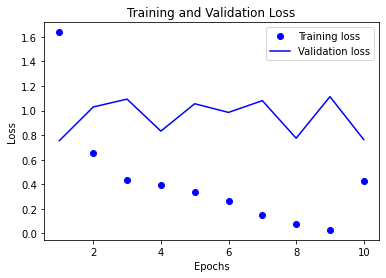

In [124]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')        # 'bo' is for blue dots
plt.plot(epochs, val_acc, 'b', label='Validation acc')   # 'b' is for blue line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Start a new figure for loss
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show both plots
plt.show()


## Listing 6.16 Training the same model without pretrained word embeddings

In [126]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Initialize the model
model = Sequential()

# Add layers
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))  # Embedding layer to learn word vectors
model.add(Flatten())                                                 # Flatten the 3D embedding tensor to 2D
model.add(Dense(32, activation='relu'))                              # Fully connected layer with ReLU
model.add(Dense(1, activation='sigmoid'))                            # Output layer with sigmoid for binary classification

# Model summary
model.summary()

# Compile the model
model.compile(
    optimizer='rmsprop',                # Optimizer for gradient descent
    loss='binary_crossentropy',         # Suitable for binary classification
    metrics=['acc']                     # Accuracy metric
)

# Fit the model on training data
history = model.fit(
    x_train, y_train,                   # Training data
    epochs=10,                          # Number of passes through the full dataset
    batch_size=32,                      # Number of samples per gradient update
    validation_data=(x_val, y_val)     # Data for evaluating loss and accuracy after each epoch
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 3s 271ms/step - loss: 0.6928 - acc: 0.5450 - val_loss: 0.6919 - val_acc: 0.5215
Epoch 2/10
7/7 [==============================